- The metric used to evaluate the model is the macro F1 score. Because the accuracy is not a good metric for imbalanced datasets, since it can be high even if the model is not performing well on the minority class. The F1 score is the harmonic mean of precision and recall, and it is a better metric for imbalanced datasets.
  In addition, the macro F1 score is the average of the F1 score of each class, and it consider all classes equally, which is important in this case since the dataset is imbalanced.

Best 0.3_0.7_10

In [1]:
# import all the functions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import os
import sys
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

sys.path.append("../")
import pandas as pd

In [2]:
def read_file(file_path: str):

    dataset = []  # Initialize an empty list to store dataset
    data = None  # Initialize data to None

    # Check if the file path indicates posterior or both types of data
    # Load the data from the file and extract the "train_bal" subset
    data = np.load(file_path, allow_pickle=True).item()

    # Separate features (X) and labels (y), then concatenate them into one array
    X_train = data["train"]["X"]
    y_train = data["train"]["y"]
    X_test = data["test"]["X"]
    y_test = data["test"]["y"]
    # Convert the dataset into a pandas DataFrame with feature names and label

    return X_train, y_train, X_test, y_test



In [3]:
THRESH_1 = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
THRESH_2 = [0.6, 0.7, 0.8, 0.9, 1]
N_FEATURES = [5, 10, 15, 20, 25, 30, 40]
FOLDER = "../../features/balanced/priori/thresholds/"
INTERVAL=1

results_df = pd.DataFrame(
    columns=[
        "n_features",
        "threshold1",
        "threshold2",
        "accuracy",
        "precision micro",
        "precision macro",
        "recall weighted",
        "recall macro",
        "recall micro",
        "f1_score macro",
        "f1_score micro",
    ]
)

for n_features in N_FEATURES:
    for threshold1 in THRESH_1:
        for threshold2 in THRESH_2:
            print(
                f"n_features: {n_features}, threshold1: {threshold1}, threshold2: {threshold2}"
            )
            # Construct the full file path for the current feature file
            file_path = os.path.join(
                FOLDER,
                f"full_data_filtered_{INTERVAL}s_4000hz_{threshold1}_{threshold2}_{n_features}_USERAUGMENTED.npy",
            )
            X_train, y_train, X_test, y_test = read_file(file_path)

            # Create a random forest classifier
            clf = RandomForestClassifier(random_state=42)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            precision_micro = precision_score(y_test, y_pred, average="micro")
            precision_macro = precision_score(y_test, y_pred, average="macro")
            recall_micro = recall_score(y_test, y_pred, average="micro")
            recall_macro = recall_score(y_test, y_pred, average="macro")
            f1_micro = f1_score(y_test, y_pred, average="micro")
            f1_macro = f1_score(y_test, y_pred, average="macro")
            
            new_row = {
                "n_features": n_features,
                "threshold1": threshold1,
                "threshold2": threshold2,
                "accuracy": accuracy,
                "precision micro": precision_micro,
                "precision macro": precision_macro,
                "recall macro": recall_macro,
                "recall micro": recall_micro,
                "f1_score macro": f1_macro,
                "f1_score micro": f1_micro,
            }
            results_df.loc[len(results_df)] = new_row

results_df.loc[len(results_df)] = new_row
results_df.to_csv("results.csv", index=False)

n_features: 5, threshold1: 0, threshold2: 0.6
n_features: 5, threshold1: 0, threshold2: 0.7
n_features: 5, threshold1: 0, threshold2: 0.8
n_features: 5, threshold1: 0, threshold2: 0.9
n_features: 5, threshold1: 0, threshold2: 1
n_features: 5, threshold1: 0.1, threshold2: 0.6
n_features: 5, threshold1: 0.1, threshold2: 0.7
n_features: 5, threshold1: 0.1, threshold2: 0.8
n_features: 5, threshold1: 0.1, threshold2: 0.9
n_features: 5, threshold1: 0.1, threshold2: 1
n_features: 5, threshold1: 0.2, threshold2: 0.6
n_features: 5, threshold1: 0.2, threshold2: 0.7
n_features: 5, threshold1: 0.2, threshold2: 0.8
n_features: 5, threshold1: 0.2, threshold2: 0.9
n_features: 5, threshold1: 0.2, threshold2: 1
n_features: 5, threshold1: 0.3, threshold2: 0.6
n_features: 5, threshold1: 0.3, threshold2: 0.7
n_features: 5, threshold1: 0.3, threshold2: 0.8
n_features: 5, threshold1: 0.3, threshold2: 0.9
n_features: 5, threshold1: 0.3, threshold2: 1
n_features: 5, threshold1: 0.4, threshold2: 0.6
n_features

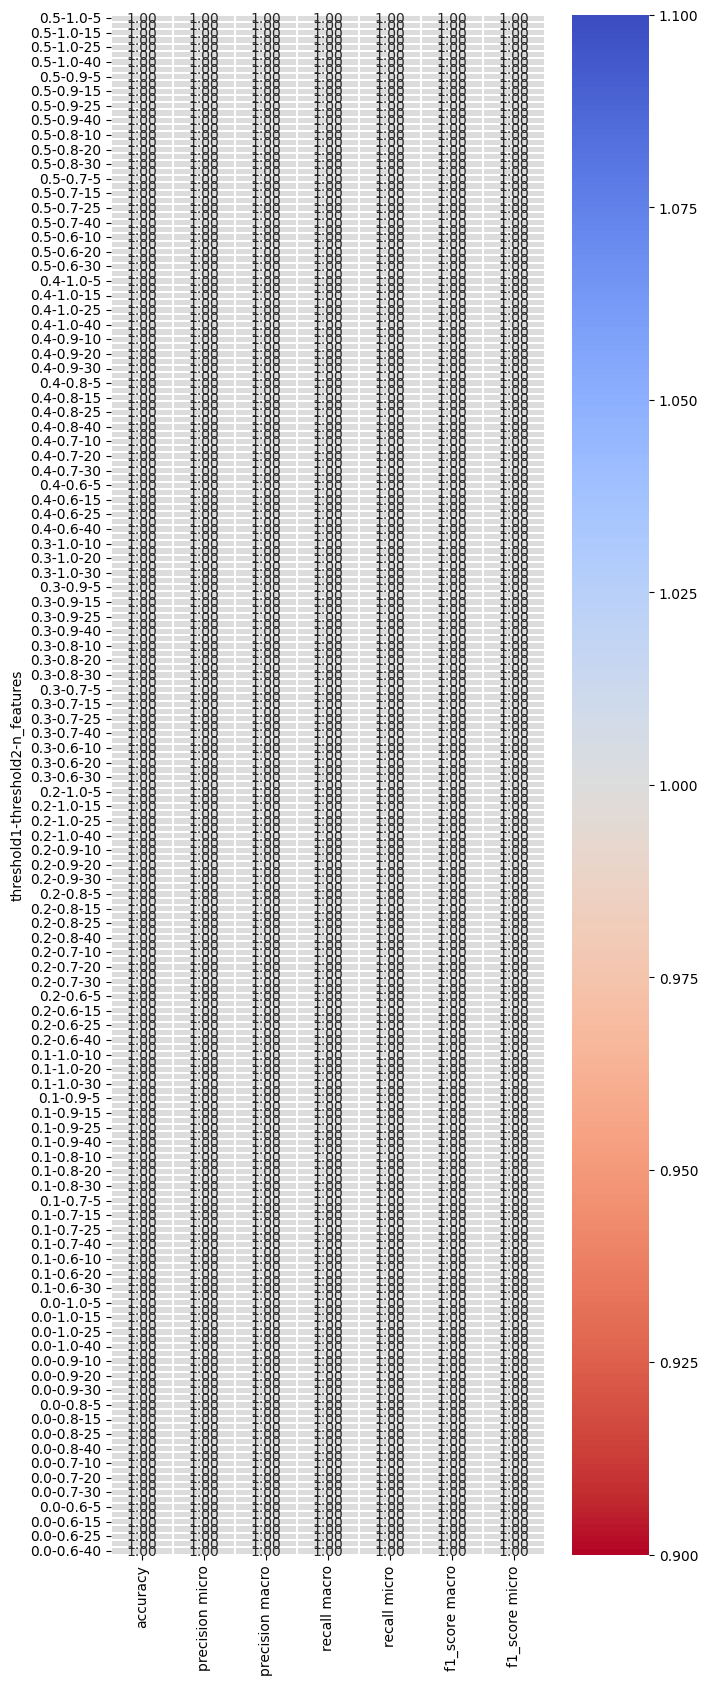

In [7]:
results_df = pd.read_csv("results.csv")
results_df.drop(columns=["recall weighted"], inplace=True)
results_df.sort_values(["threshold1", "threshold2"], ascending=False, inplace=True)
new_df = results_df.set_index(
    [
        "threshold1",
        "threshold2",
        "n_features",
    ]
)
new_df= new_df[new_df>=0.65]
new_df = new_df.dropna()
new_df
plt.figure(figsize=(7, 20))
sns.heatmap(
    new_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm_r",
    linewidths=0.05,
    cbar=True,
)
plt.show()

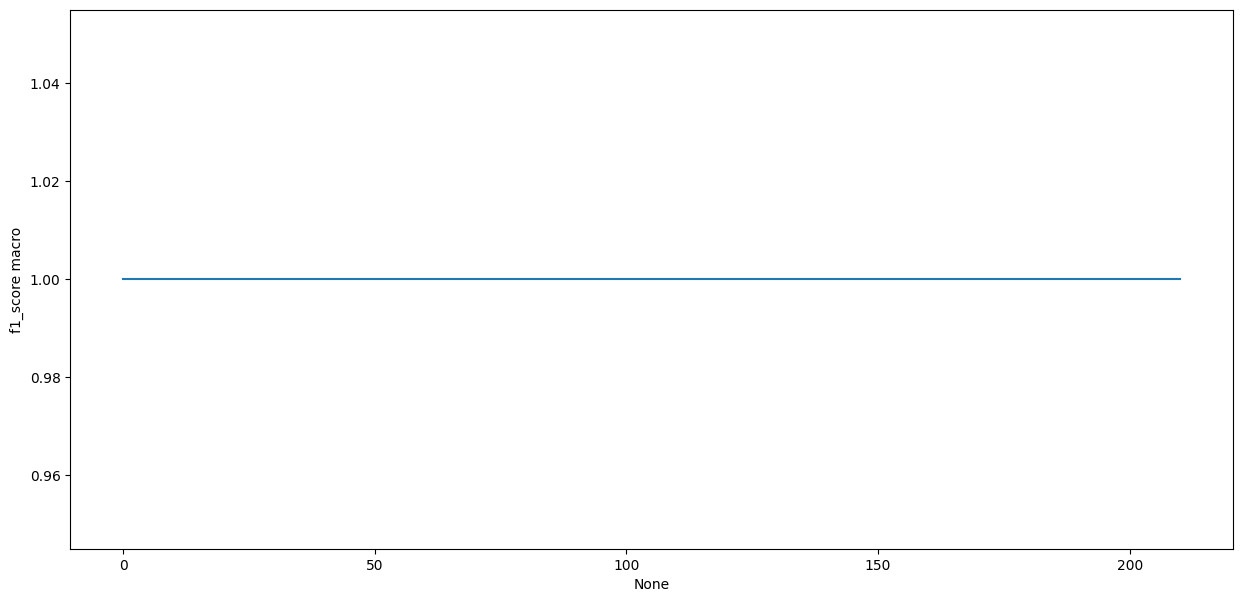

In [8]:
analysis_df = results_df.copy()
analysis_df.reset_index(inplace=True)
analysis_df["filter"]= analysis_df["threshold1"].astype(str) + " - " + analysis_df["threshold2"].astype(str)+ " - " + analysis_df["n_features"].astype(str)
analysis_df= analysis_df[["filter","f1_score macro"]]

g=sns.lineplot(data=analysis_df, x=analysis_df.index, y="f1_score macro")
g.figure.set_size_inches(15, 7)


In [9]:
threshold1_df = results_df.groupby(["threshold1"]).max()
threshold1_df

,n_features,threshold2,accuracy,precision micro,precision macro,recall macro,recall micro,f1_score macro,f1_score micro
threshold1,,,,,,,,,
0.0,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.1,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.2,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.3,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.4,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.5,40,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
threshold2_df = results_df.groupby(["threshold2"]).max()
threshold2_df

,n_features,threshold1,accuracy,precision micro,precision macro,recall macro,recall micro,f1_score macro,f1_score micro
threshold2,,,,,,,,,
0.6,40,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.7,40,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.8,40,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0.9,40,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.0,40,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
n_features_df = results_df.groupby(["n_features"]).max()
n_features_df

,threshold1,threshold2,accuracy,precision micro,precision macro,recall macro,recall micro,f1_score macro,f1_score micro
n_features,,,,,,,,,
5,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
15,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
30,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
40,0.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [12]:
results_df.set_index(["threshold1", "threshold2", "n_features"], inplace=True)
for column in results_df.columns:
    print(f"{column}: {results_df[column].idxmax()} - {results_df[column].max()}")

accuracy: (0.5, 1.0, 5) - 1.0
precision micro: (0.5, 1.0, 5) - 1.0
precision macro: (0.5, 1.0, 5) - 1.0
recall macro: (0.5, 1.0, 5) - 1.0
recall micro: (0.5, 1.0, 5) - 1.0
f1_score macro: (0.5, 1.0, 5) - 1.0
f1_score micro: (0.5, 1.0, 5) - 1.0


/tmp/ipykernel_2073/2283516892.py:6: PerformanceWarning: indexing past lexsort depth may impact performance.
  row1 = results_df.loc[0, 0.6, 30].reset_index().values
/tmp/ipykernel_2073/2283516892.py:7: PerformanceWarning: indexing past lexsort depth may impact performance.
  row2 = results_df.loc[0, 1, 40].reset_index().values


<Axes: title={'center': 'Best Filter vs No Filter'}>

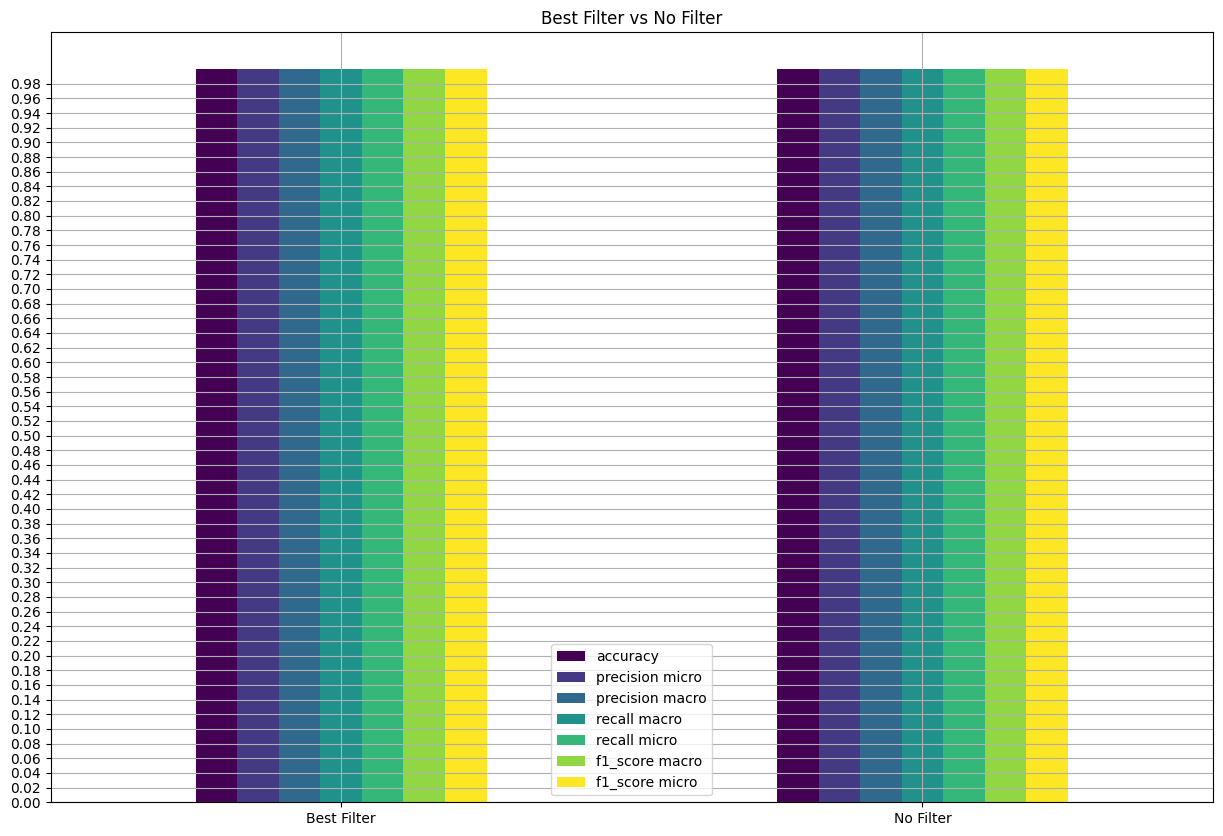

In [13]:
# Specifying the index values for the two rows
best_filter = (0, 0.6, 30)
no_filter = (0, 1, 40)

# Accessing the specific rows
row1 = results_df.loc[0, 0.6, 30].reset_index().values
row2 = results_df.loc[0, 1, 40].reset_index().values

# Creating a DataFrame with the two rows
df = pd.DataFrame(
    data=[row1[0], row2[0]],
    columns=results_df.reset_index().columns,
    index=["Best Filter", "No Filter"],
)

df.drop(columns=["threshold1","threshold2","n_features"], inplace=True)
df.plot(kind="bar", figsize=(15, 10), title="Best Filter vs No Filter", rot=0, colormap="viridis",grid=True,yticks=np.arange(0, 1, 0.02))